In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [54]:
df['species'] = df['species'].map({'setosa':0,'versicolor':1,'virginica':2}).astype(int)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,2
67,5.8,2.7,4.1,1.0,1
88,5.6,3.0,4.1,1.3,1
81,5.5,2.4,3.7,1.0,1
128,6.4,2.8,5.6,2.1,2


In [55]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
len(X_train),len(y_train)

(120, 120)

In [58]:
len(X_test),len(y_test)

(30, 30)

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # dense -> hidden layer
from tensorflow.keras.activations import softmax,relu

In [60]:
X.shape[1]

4

In [61]:
model = Sequential() # Sequential is used to build architectures and it is a class -> model is an object for that

model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu',input_dim = X.shape[1])) # HL1
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu')) # HL2
model.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu')) # HL3
model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu')) # HL4

model.add(Dense(units=3,kernel_initializer='glorot_uniform',activation='softmax')) # output layer

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,011 (11.76 KB)

 Trainable params: 3,011 (11.76 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(optimizer='adam',metrics=['accuracy'],loss = 'categorical_crossentropy')

In [64]:
y_train[:5]

,species
22,0
15,0
65,1
11,0
42,0


In [65]:
y_train_p = tf.keras.utils.to_categorical(y_train,num_classes=3)
y_train_p[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [66]:
# know I will give the data to the above architecture

model.fit(X_train,y_train_p,epochs=50,batch_size=15,validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2584 - loss: 2.9226 - val_accuracy: 0.5000 - val_loss: 1.3722
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3701 - loss: 1.3037 - val_accuracy: 0.5000 - val_loss: 0.9330
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2349 - loss: 1.0265 - val_accuracy: 0.5000 - val_loss: 0.8836
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2796 - loss: 0.9652 - val_accuracy: 0.5000 - val_loss: 0.8298
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2889 - loss: 0.9429 - val_accuracy: 0.5000 - val_loss: 0.7999
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2739 - loss: 0.9316 - val_accuracy: 0.5000 - val_loss: 0.7830
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3063 - loss: 0.8946 - val_accuracy: 0.5000 - val_loss: 0.7770
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5131 - loss: 0.9100 - val_accuracy: 0.7083 - val_loss: 0.7717
Epoch

In [67]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [68]:
model.history.history['accuracy']

[0.28125,
 0.3541666567325592,
 0.28125,
 0.28125,
 0.28125,
 0.28125,
 0.28125,
 0.6041666865348816,
 0.6458333134651184,
 0.6354166865348816,
 0.6354166865348816,
 0.6458333134651184,
 0.6458333134651184,
 0.6354166865348816,
 0.6458333134651184,
 0.6458333134651184,
 0.6458333134651184,
 0.6458333134651184,
 0.6458333134651184,
 0.6458333134651184,
 0.6458333134651184,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.6458333134651184,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.6666666865348816,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.6666666865348816,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625]

In [69]:
model.history.history['loss']

[2.5065431594848633,
 1.2089020013809204,
 0.9966142773628235,
 0.9616655707359314,
 0.9433269500732422,
 0.925517737865448,
 0.9101408123970032,
 0.8996302485466003,
 0.8886839747428894,
 0.8789966106414795,
 0.8715198040008545,
 0.861185610294342,
 0.8528441786766052,
 0.8455060124397278,
 0.8374599814414978,
 0.8307030200958252,
 0.8249457478523254,
 0.8203046917915344,
 0.8152873516082764,
 0.8099271655082703,
 0.805875301361084,
 0.8016030192375183,
 0.7978528141975403,
 0.7943081855773926,
 0.7905630469322205,
 0.7876365780830383,
 0.7841753959655762,
 0.781212568283081,
 0.7783104777336121,
 0.7753892540931702,
 0.7728340029716492,
 0.769808828830719,
 0.7683355808258057,
 0.7642552256584167,
 0.7617107033729553,
 0.7586594223976135,
 0.7556782364845276,
 0.7532002329826355,
 0.7508010268211365,
 0.7475662231445312,
 0.7442811131477356,
 0.7416388988494873,
 0.7389711737632751,
 0.7356612682342529,
 0.7325530052185059,
 0.7293819785118103,
 0.7261464595794678,
 0.722529470920562

In [70]:
model.history.history['val_accuracy']

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.75,
 0.75,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.75,
 0.7083333134651184,
 0.7083333134651184,
 0.75,
 0.7083333134651184,
 0.75,
 0.75,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184,
 0.7083333134651184]

In [71]:
model.history.history['val_loss']

[1.3722225427627563,
 0.9329985976219177,
 0.8836030960083008,
 0.8297792077064514,
 0.7998515963554382,
 0.7829734683036804,
 0.7769684791564941,
 0.7716639637947083,
 0.7598726749420166,
 0.7524763941764832,
 0.7513907551765442,
 0.7445531487464905,
 0.7381561398506165,
 0.7343032360076904,
 0.734592616558075,
 0.7328207492828369,
 0.729682445526123,
 0.7277946472167969,
 0.7315362095832825,
 0.7308902740478516,
 0.730978786945343,
 0.7326768040657043,
 0.7312410473823547,
 0.729180634021759,
 0.7295710444450378,
 0.7273288369178772,
 0.722200870513916,
 0.7205531001091003,
 0.7174456715583801,
 0.7147927284240723,
 0.7130702137947083,
 0.7073488235473633,
 0.7007679343223572,
 0.7014050483703613,
 0.7011831402778625,
 0.6968550086021423,
 0.6967267990112305,
 0.6970550417900085,
 0.6970445513725281,
 0.6898188591003418,
 0.6882664561271667,
 0.687279999256134,
 0.6790719032287598,
 0.6795844435691833,
 0.6755304336547852,
 0.6683657169342041,
 0.6633133292198181,
 0.65729820728302,


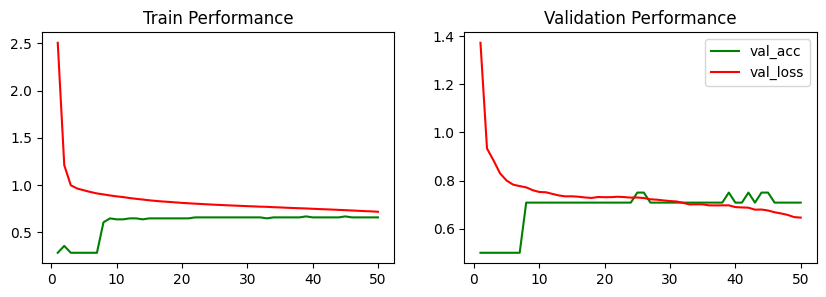

In [72]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.title('Train Performance')
plt.plot(np.arange(1,51),model.history.history['accuracy'],color='g',label = 'train_acc')
plt.plot(np.arange(1,51),model.history.history['loss'],color='r',label = 'train_loss')

plt.subplot(1,2,2)
plt.title('Validation Performance')
plt.plot(np.arange(1,51),model.history.history['val_accuracy'],color='g',label = 'val_acc')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='r',label = 'val_loss')
plt.legend(loc=0)
plt.show()

**Test_data**

In [73]:
# 114 rows are available for test_data

X_test.head(1)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2


In [74]:
y_test.head(1)

,species
73,1


In [76]:
d = []
for i in X_test.columns:
  d.append(X_test[i][73])
print(d)

[6.1, 2.8, 4.7, 1.2]


In [77]:
d = np.array(d).reshape(1,-1)
d.shape

(1, 4)

In [79]:
# giving the data to the trained NN
model.predict(d)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.00268779, 0.4510987 , 0.5462135 ]], dtype=float32)

In [80]:
labels = ['setosa','versicolor','virginica']

In [82]:
labels[np.argmax(model.predict(d))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'virginica'

In [83]:
y_test_pred = model.predict(X_test)
y_test_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[2.6877925e-03, 4.5109865e-01, 5.4621345e-01],
       [4.4446906e-01, 3.0591610e-01, 2.4961475e-01],
       [2.8088680e-06, 3.3986649e-01, 6.6013074e-01],
       [3.3620948e-03, 4.5462710e-01, 5.4201078e-01],
       [2.1407630e-03, 4.4745362e-01, 5.5040568e-01],
       [4.4446906e-01, 3.0591610e-01, 2.4961475e-01],
       [3.8918417e-02, 4.7962937e-01, 4.8145217e-01],
       [3.7799633e-04, 4.1884598e-01, 5.8077598e-01],
       [7.4323220e-04, 4.3008253e-01, 5.6917429e-01],
       [1.6619235e-02, 4.7587955e-01, 5.0750136e-01],
       [6.4770156e-04, 4.2779833e-01, 5.7155406e-01],
       [4.4446906e-01, 3.0591610e-01, 2.4961475e-01],
       [4.4446906e-01, 3.0591610e-01, 2.4961475e-01],
       [4.4446906e-01, 3.0591610e-01, 2.4961475e-01],
       [4.4446906e-01, 3.0591610e-01, 2.4961475e-01],
       [4.7483342e-03, 4.5991656e-01, 5.3533512e-01],
       [4.0600255e-05, 3.8212043e-01, 6.1783904e-01],
       [1.2144762e-02, 4.7261196e-01, 5.1524329e-01],
       [3.1958981e-03, 4.538

In [84]:
c = []
for i in y_test_pred:
  if np.argmax(i) == 0:
    c.append(0)
  elif np.argmax(i) == 1:
    c.append(1)
  else:
    c.append(2)

In [85]:
c

[2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0]

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [87]:
confusion_matrix(y_test,c)

array([[10,  0,  0],
       [ 0,  0,  9],
       [ 0,  0, 11]])

In [88]:
accuracy_score(y_test,c)

0.7